In this section we will examine my assumpation that player experience is a main factor on regular season domination 
I'll explore it through player of the week award

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

df_player_of_the_week = pd.read_csv('NBA_player_of_the_week.csv')

### Q: Is experience is a main factor on regular season domination 

<IPython.core.display.Javascript object>


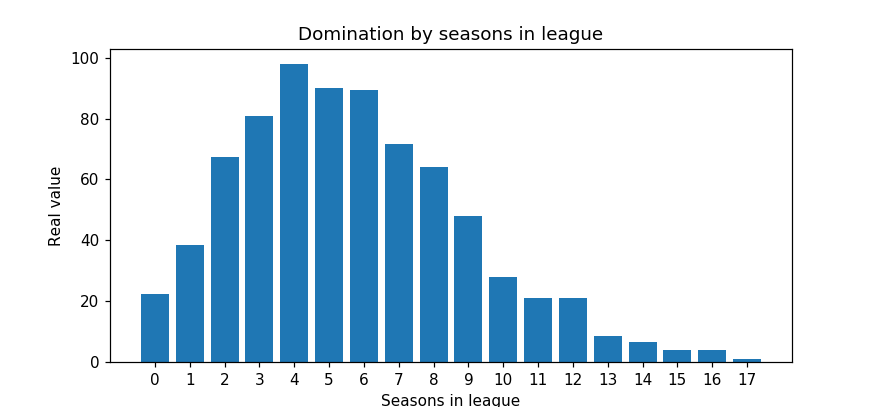

In [148]:
df_seasons_in_league_domination = df_player_of_the_week.groupby(['Seasons in league'])['Real_value'].sum().reset_index()
plt.figure(figsize=(8,3.7))
plt.bar(pd.to_numeric(df_seasons_in_league_domination['Seasons in league']),df_seasons_in_league_domination['Real_value'])
plt.xticks(pd.to_numeric(df_seasons_in_league_domination['Seasons in league']))
plt.xlabel('Seasons in league')
plt.ylabel('Real value')
plt.title('Domination by seasons in league')

##### A: We can see that the dominant season is the 5th season [after full 4 seasons]

### Q: Are all years have the same behavior?

<IPython.core.display.Javascript object>


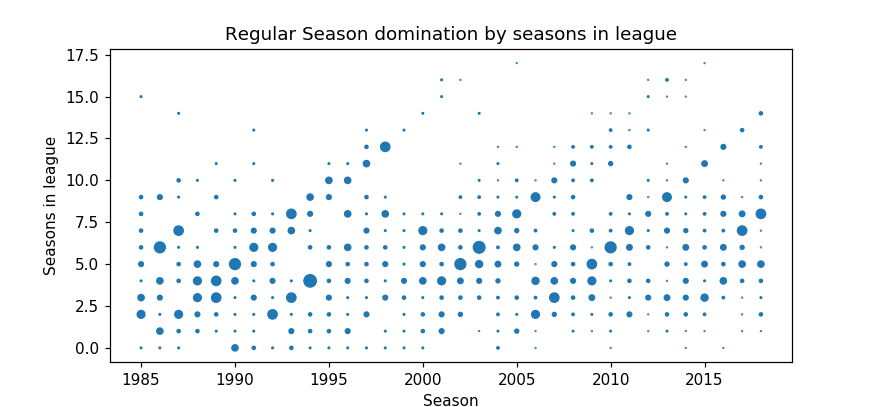

In [150]:
df_seasons_in_league_domination_over_seasons = df_player_of_the_week.groupby(['Season short','Seasons in league'])[
    'Real_value'].sum().reset_index()

plt.figure(figsize=(8,3.7))
plt.scatter(df_seasons_in_league_domination_over_seasons['Season short'], 
            df_seasons_in_league_domination_over_seasons['Seasons in league'],
            s=df_seasons_in_league_domination_over_seasons['Real_value']**2)
plt.xlabel('Season')
plt.ylabel('Seasons in league')
plt.title('Regular Season domination by seasons in league')

##### A: I assume that every years range is "owned" by a regular season star that changes the domination pattern,
#####     However, the general pattern stays over the years.


### Q: Do the top 10 awarded players behave the same?

In [180]:
# get the total points by player
df_players_domination = df_player_of_the_week.groupby(['Player'])[
    'Real_value'].sum().reset_index().rename(columns={'Real_value': 'Total_real_value'})
# get top 10 players
df_players_domination = df_players_domination.nlargest(10,'Total_real_value')
df_player_of_the_week_for_top = df_player_of_the_week.groupby(['Player','Season short','Season','Seasons in league'])[
      'Real_value'].sum().reset_index()
df_players_domination_by_season_in_league = pd.merge(df_players_domination, df_player_of_the_week_for_top, how='left', 
                                                     on=['Player'], copy=True)    
# lets see who are the top 10 players
df_players_domination

,Player,Total_real_value
168,LeBron James,30.5
186,Michael Jordan,24.0
140,Karl Malone,22.5
156,Kobe Bryant,17.5
237,Shaquille O'Neal,16.0
63,David Robinson,15.0
255,Tim Duncan,14.0
7,Allen Iverson,13.5
148,Kevin Durant,13.0
149,Kevin Garnett,12.5


<IPython.core.display.Javascript object>


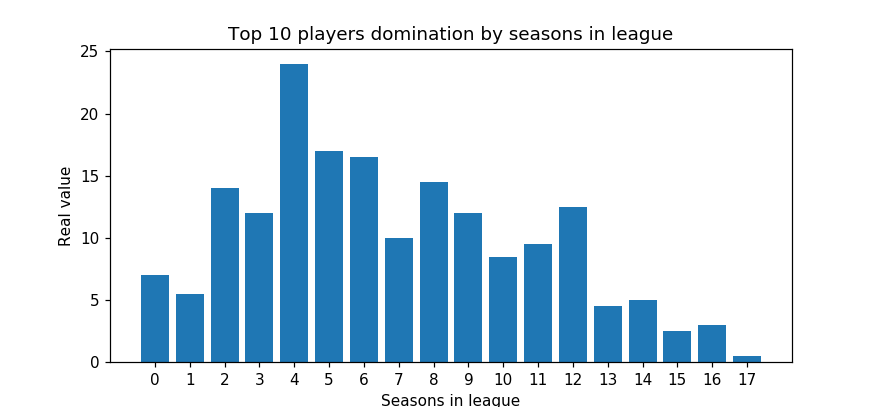

In [181]:
df_player_of_the_week_for_top_bar = df_players_domination_by_season_in_league.groupby(['Seasons in league'])['Real_value'].sum().reset_index()
plt.figure(figsize=(8,3.7))
plt.bar(pd.to_numeric(df_player_of_the_week_for_top_bar['Seasons in league']),
        df_player_of_the_week_for_top_bar['Real_value'])
plt.xticks(pd.to_numeric(df_player_of_the_week_for_top_bar['Seasons in league']))
plt.xlabel('Seasons in league')
plt.ylabel('Real value')
plt.title('Top 10 players domination by seasons in league')

##### A: We can see that there isn't a pattern for the top 10 players, I assume that every player from the top has its own unique pattern.
#####       The spikes that caught my eyes are on season 0 and season 12

### Q: Do the top 10 Are years have some effect?

<IPython.core.display.Javascript object>


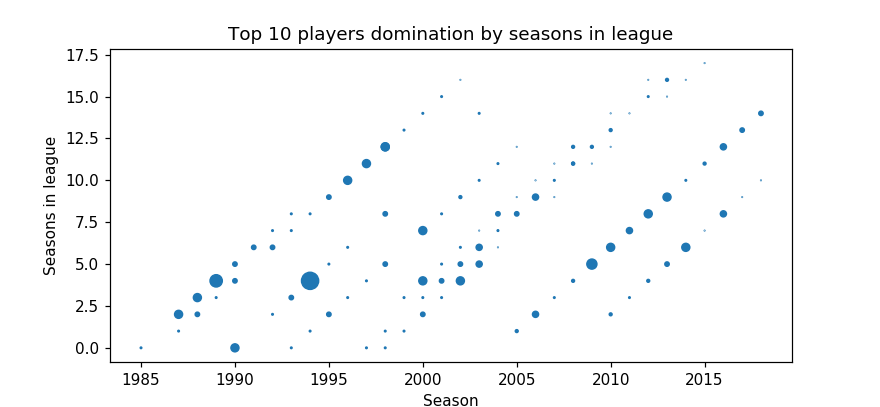

In [189]:
plt.figure(figsize=(8,3.7))
plt.scatter(df_players_domination_by_season_in_league['Season short'], 
            df_players_domination_by_season_in_league['Seasons in league'],
            s=df_players_domination_by_season_in_league['Real_value']**3)
plt.xlabel('Season')
plt.ylabel('Seasons in league')
plt.title('Top 10 players domination by seasons in league')


##### A: We can see that there isn't  a pattern over the years

## Let's check out the 1st season

In [192]:
df_players_domination_by_season_in_league[df_players_domination_by_season_in_league['Seasons in league'] == 0].groupby(
    ['Player','Season short'])['Real_value'].sum().reset_index().sort_values('Real_value',ascending= False)

,Player,Season short,Real_value
1,David Robinson,1990,3.0
0,Allen Iverson,1997,1.0
2,Michael Jordan,1985,1.0
3,Shaquille O'Neal,1993,1.0
4,Tim Duncan,1998,1.0


#### Remarkable first regular season of Robinsion led the Spurs to the best season record 56–26, and to the Western semi finals

### Let's check out the 13tn season in league

In [190]:
df_players_domination_by_season_in_league[df_players_domination_by_season_in_league['Seasons in league'] == 12].groupby(
    ['Player','Season'])['Real_value'].sum().reset_index().sort_values('Real_value',ascending= False)

,Player,Season,Real_value
0,Karl Malone,1997-1998,3.0
4,Michael Jordan,1997-1998,3.0
3,LeBron James,2015-2016,2.5
1,Kevin Garnett,2007-2008,1.5
2,Kobe Bryant,2008-2009,1.5
5,Shaquille O'Neal,2004-2005,0.5
6,Tim Duncan,2009-2010,0.5


#### Jordan & Malone responsible for the spike at the 12th season in the league at season 1997-8
#### Bulls & Jazz finished with the same regular season record 62-20, finished with jordan 6th title
#### At 2015-6 the warriors set a new regular season record 73-9, however the Cavs won the title
#### At 2007-8 the Celtics with Garnett won the title
#### At 2008-9 the Lakers with Bryant won the title
#### If you see a player that shines on it's 13 regular season, don't bet against him [unless he facing Jordan